In [1]:
import numpy as np
import scipy.signal as signal
%matplotlib notebook
import matplotlib.pyplot as plt

In [71]:
R = 1000

def diode (x):
    v_t = 25.9 / 1000
    I_s = 0.2
    return I_s * (np.exp (x / v_t) - 1)

def diode_dot (x):
    v_t = 25.9 / 1000
    I_s = 0.2
    return I_s / v_t * (np.exp (x / v_t))

In [72]:
def deriv (x, x_1, x_1_dot, T):
    return (x - x_1) * (2/T) - x_1_dot

def integral (x_1, x_dot, x_1_dot, T):
    return x_1 + (T/2) * (x_dot + x_1_dot)

<IPython.core.display.Javascript object>


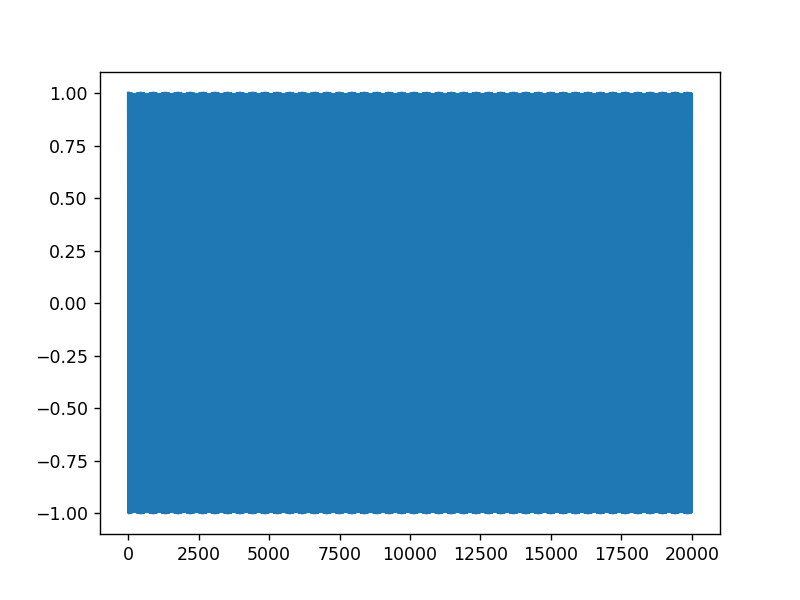

In [73]:
fs = 44100
N = 20000
freq = 2000
n = np.arange (N)
x = np.zeros (N)
x[:N] = np.cos (2 * np.pi * n[:N] * freq / fs) # / 10000
plt.figure()
plt.plot (x)

In [75]:
v_o = 0

y = np.zeros (N)

for n in range (N):
    v_i = x[n]
    for k in range (10):
        I_D = diode (v_o)
        r_D = 1.0 / diode_dot (v_o)
        
        v_o_last = v_o
        v_o = ((v_i / R) - I_D) * ((R * r_D) / (R + r_D))
        
        if (abs (v_o - v_o_last) < 1e-6):
            break
    
    y[n] = v_o

<IPython.core.display.Javascript object>


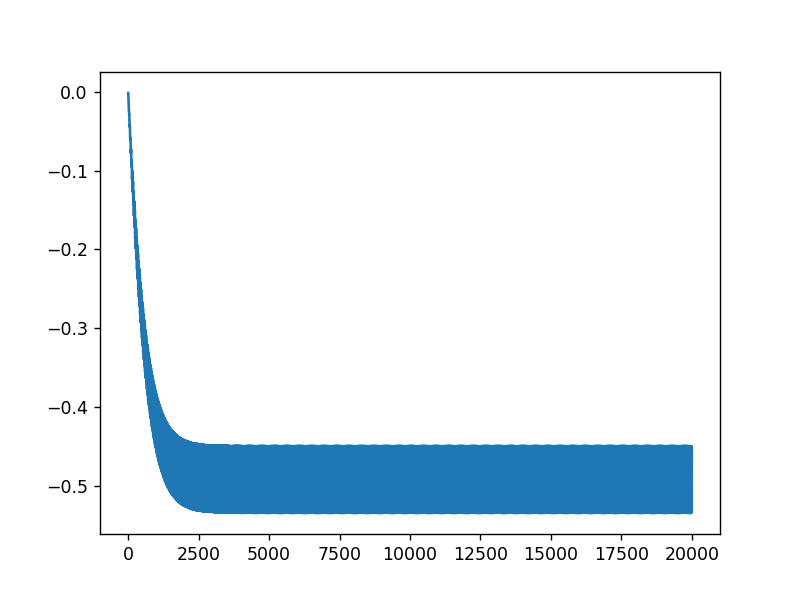

In [76]:
plt.figure()
plt.plot (1000*y)
# plt.plot (x)